In [1]:
# # Exploring the Bias-Variance Tradeoff

import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

/Users/sinanozdemir/anaconda/envs/sfdat28/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# ## Brain and body weight

'''
This is a [dataset]) of the average 
weight of the body and the brain for 
62 mammal species. Let's read it into pandas and 
take a quick look:
'''

df = pd.read_table('http://people.sc.fsu.edu/~jburkardt/datasets/regression/x01.txt', sep='\s+', skiprows=33, names=['id','brain','body'], index_col='id')
df.head()

,brain,body
id,,
1,3.385,44.5
2,0.480,15.5
3,1.350,8.1
4,465.000,423.0
5,36.330,119.5


In [3]:
df.describe()

,brain,body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [4]:
# We're going to focus on a smaller subset in which the body weight is less than 200:
df = df[df.body < 200]
df.shape

(51, 2)

(-10, 250)

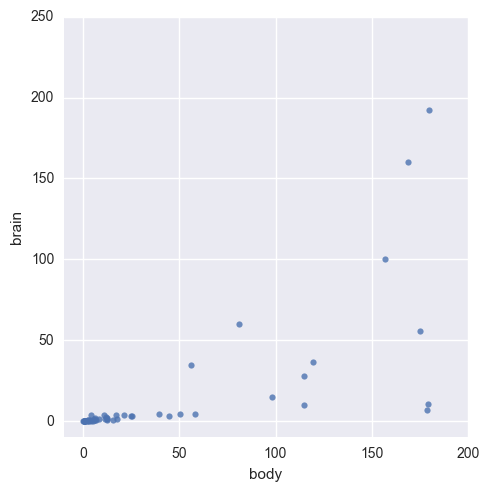

In [5]:
'''
We're actually going to pretend that there are 
only 51 mammal species in existence. In other words, 
we are pretending that this is the entire dataset of brain 
and body weights for **every known mammal species**.
'''
# Let's create a scatterplot (using Seaborn) to visualize the relationship between brain and body weight:
sns.lmplot(x='body', y='brain', data=df, ci=None, fit_reg=False)
sns.plt.xlim(-10, 200)
sns.plt.ylim(-10, 250)
# There appears to be a relationship between brain and body weight for mammals.

(-10, 250)

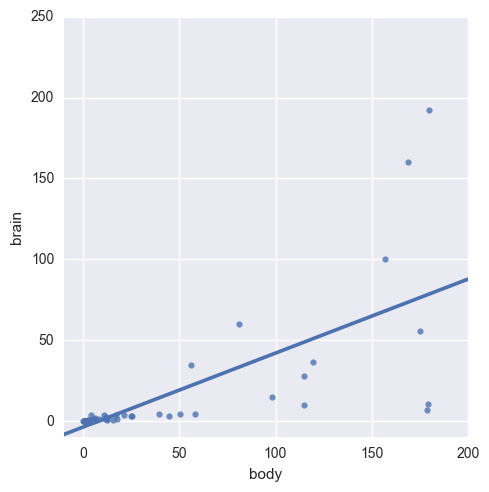

In [6]:
# ## Making a prediction

# Now let's pretend that a **new mammal species** is discovered. We measure the body weight of every member of this species that we can find, and calculate an **average body weight of 100**. We want to **predict the average brain weight** of this species (rather than measuring it directly). How might we do this?
sns.lmplot(x='body', y='brain', data=df, ci=None)
sns.plt.xlim(-10, 200)
sns.plt.ylim(-10, 250)

In [7]:
# We drew a straight line that appears to best 
# capture the relationship between brain and body weight. 
# So, we might predict that our new species has a brain weight 
# of about 45, since that's the approximate y value when x=100.
# This is known as a "linear model" or a 
# "linear regression model", which we will study in a 
# past class.



# ## Making a prediction from a sample

# Earlier, I said that this dataset contained every known mammal species. That's very convenient, but **in the real world, all you ever have is a sample of data**. A more realistic situation would be to only have brain and body weights for (let's say) half of the 51 known mammals.
# When that new mammal species (with a body weight of 100) is discovered, we still want to make an accurate prediction for the brain weight, but this task might be more difficult since we don't have all of the data that we would ideally like to have.
# Let's simulate this situation by assigning each of the 51 rows to **either sample 1 or sample 2**:

# set a random seed for reproducibility
np.random.seed(12345)

In [8]:
# randomly assign every row to either sample 1 or sample 2
df['sample'] = np.random.randint(1, 3, len(df))
df.head()

,brain,body,sample
id,,,
1,3.385,44.5,1
2,0.480,15.5,2
3,1.350,8.1,2
5,36.330,119.5,2
6,27.660,115.0,1


(-10, 250)

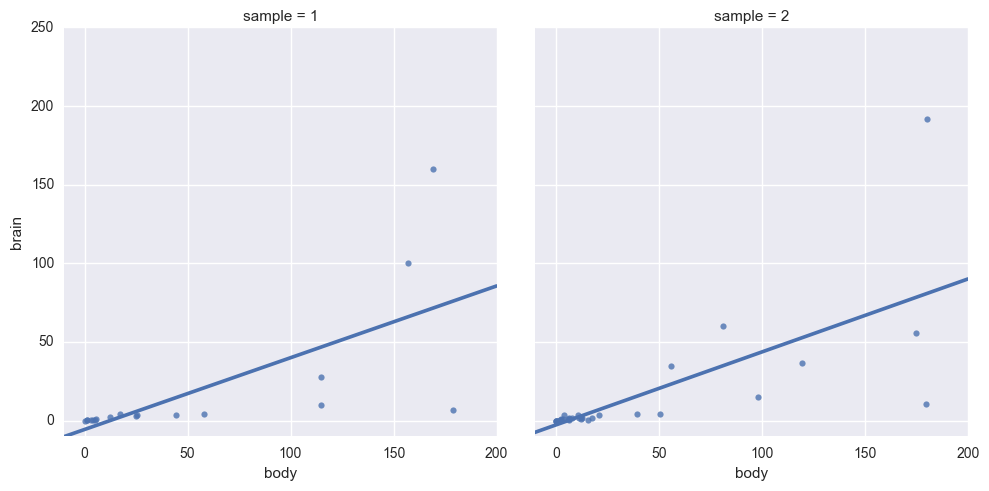

In [9]:
# We can now tell Seaborn to create two plots, 
# in which the left plot only uses the data from 
# **sample 1** and the right plot only uses the data 
# from **sample 2**:
# col='sample' subsets the data by sample and creates two 
# separate plots
sns.lmplot(x='body', y='brain', data=df, ci=None, col='sample')
sns.plt.xlim(-10, 200)
sns.plt.ylim(-10, 250)

(-10, 250)

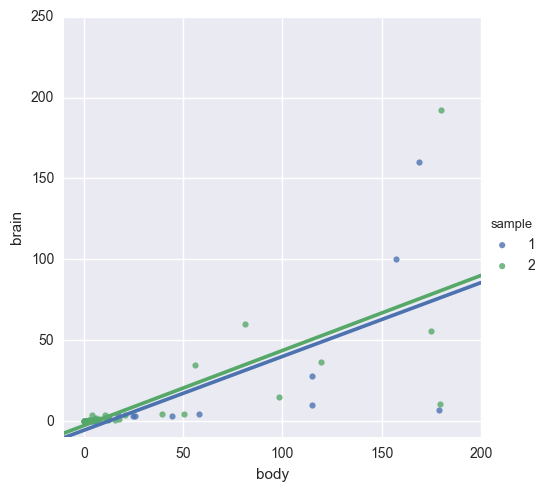

In [10]:
# The line looks pretty similar between the two plots, 
# despite the fact that they used separate samples of data. 
#In both cases, we would predict a brain weight of about 45.

# It's easier to see the degree of similarity by placing 
# them on the same plot:
# hue='sample' subsets the data by sample and creates a 
# single plot
sns.lmplot(x='body', y='brain', data=df, ci=None, hue='sample')
sns.plt.xlim(-10, 200)
sns.plt.ylim(-10, 250)

(-10, 250)

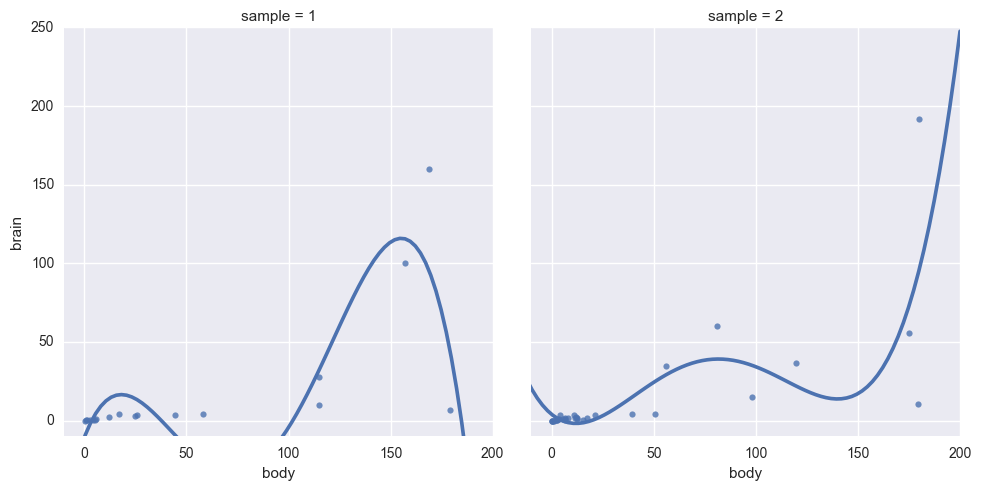

In [11]:
# What was the point of this exercise? This was a 
#visual demonstration of a high bias, low variance model:
# - It's **high bias** because it doesn't fit the data 
#particularly well.
# - It's **low variance** because it doesn't change 
#much depending upon which points happen to be in the sample.

# ## Let's try something completely different


# What would a low bias, high variance model look like? Let's try polynomial regression, with an eighth order polynomial:
sns.lmplot(x='body', y='brain', data=df, ci=None, \
col='sample', order=4)
sns.plt.xlim(-10, 200)
sns.plt.ylim(-10, 250)

(-10, 250)

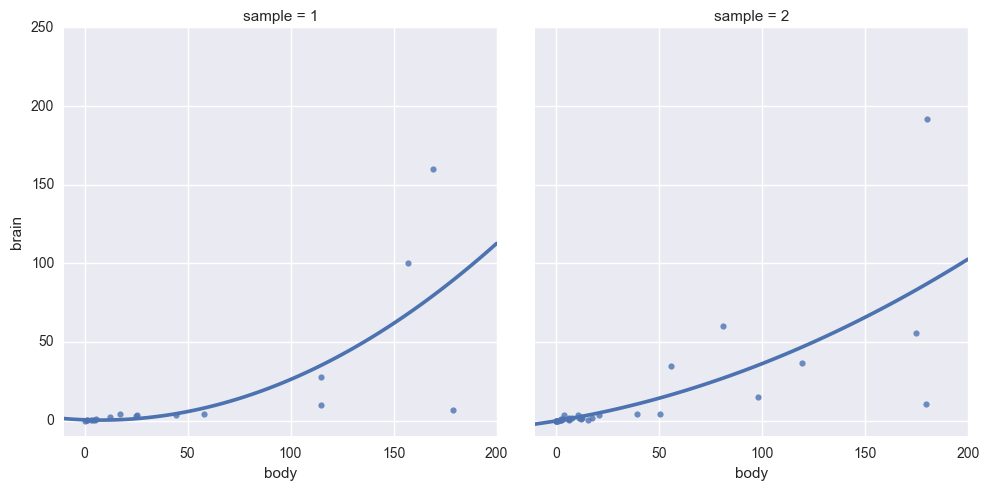

In [12]:
# - It's **low bias** because the models match the data 
#quite well!
# - It's **high variance** because the models are 
#widely different depending upon which points happen 
#to be in the sample. (For a body weight of 100, the brain weight prediction would either be 40 or 0, depending upon which data happened to be in the sample.)

# ## Can we find a middle ground?

# Perhaps we can create a model that has **less bias than the linear model**, and **less variance than the eighth order polynomial**?

# Let's try a second order polynomial instead:
sns.lmplot(x='body', y='brain', data=df, ci=None, col='sample', order=2)
sns.plt.xlim(-10, 200)
sns.plt.ylim(-10, 250)

In [13]:
# This seems better. In both the left and right plots, 
# it fits the data pretty well, but not too well
# This is the essence of the **bias-variance tradeoff**: finding a model 
# that appropriately balances bias and variance, and thus will generalize 
# to new data (known as "out of sample" data).